# Load data

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd 
from hulearn.experimental.interactive import InteractiveCharts
from hulearn.classification import InteractiveClassifier
import datapane as dp 
import matplotlib.pylab as plt
import pickle 

In [3]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [4]:
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
train = pd.concat([X_train, pd.DataFrame(y_train)], axis=1)

In [91]:
train.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target
54,6.5,2.8,4.6,1.5,1
108,6.7,2.5,5.8,1.8,2
112,6.8,3.0,5.5,2.1,2
17,5.1,3.5,1.4,0.3,0
119,6.0,2.2,5.0,1.5,2
103,6.3,2.9,5.6,1.8,2
58,6.6,2.9,4.6,1.3,1
118,7.7,2.6,6.9,2.3,2
18,5.7,3.8,1.7,0.3,0
4,5.0,3.6,1.4,0.2,0


# Draw

In [9]:
charts = InteractiveCharts(train, labels='target')

Loading BokehJS ...

In [10]:
charts.add_chart(x='sepal_length', y='sepal_width')

In [11]:
charts.add_chart(x='petal_length', y='petal_width')

In [12]:
charts.add_chart(x='sepal_length', y='petal_width')

In [13]:
charts.add_chart(x='petal_length', y='sepal_width')

# Create model

In [17]:
model = InteractiveClassifier(json_desc=charts.data())

In [18]:
preds = model.fit(X_train, y_train).predict_proba(X_train)

In [19]:
print('Shape:', preds.shape)
print('Classes:', model.classes_)
print('Predictions:\n', preds[:5, :])

Shape: (112, 3)
Classes: [1, 2, 0]
Predictions:
 [[5.71326574e-01 4.28530630e-01 1.42795945e-04]
 [2.00079952e-01 7.99720168e-01 1.99880072e-04]
 [2.00079952e-01 7.99720168e-01 1.99880072e-04]
 [2.49812641e-04 2.49812641e-04 9.99500375e-01]
 [4.99916708e-01 4.99916708e-01 1.66583375e-04]]


In [21]:
def scatter_plot_of_multiple_classes(columns: list):
    col1, col2 = columns
    plt.figure(figsize=(12, 3))
    for i in range(3):
        plt.subplot(131 + i)
        plt.scatter(X_train[col1], X_train[col2], c=preds[:, i])
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(model.classes_[i])
        plt.colorbar()
        plt.savefig('plot_prediction.png')


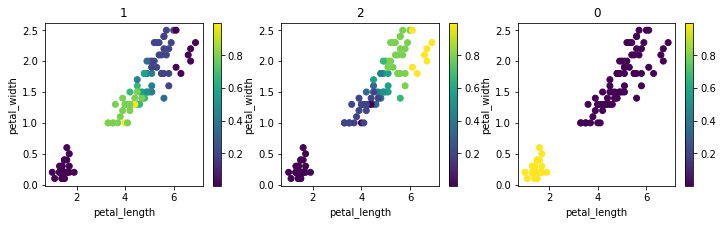

In [22]:
scatter_plot_of_multiple_classes(['petal_length', 'petal_width'])

# Predict

In [44]:
new_sample = X_test.iloc[:1]

In [46]:
new_sample

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2


In [47]:
model.predict_proba(new_sample)

array([[3.33000333e-04, 3.33000333e-04, 9.99333999e-01]])

In [55]:
pred = model.predict(new_sample)
real = y_test[:1]
print("The prediction is", pred[0])
print("The real label is", real.iloc[0])

The prediction is 0
The real label is 0


## Interpret the result

In [56]:
prediction_to_index = {0: 2, 1: 0, 2: 1}

In [67]:
def plot_prediction(prediction: int, columns: list):
    """Plot new sample

    Parameters
    ----------
    prediction : int
        prediction of the new sample
    columns : list
        Features to create a scatter plot 
    """
    
    index = prediction_to_index[prediction] 
    col1, col2 = columns
    
    plt.figure(figsize=(12, 3))
    plt.scatter(X_train[col1], X_train[col2], c=preds[:, index])
    plt.plot(new_sample[col1], new_sample[col2], 'ro', c='red', label='new_sample')
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f"Label {model.classes_[index]}")
    plt.colorbar()
    plt.legend()

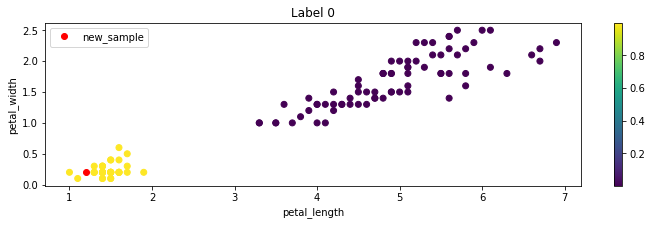

In [68]:
plot_prediction(0, columns=['petal_length', 'petal_width'])

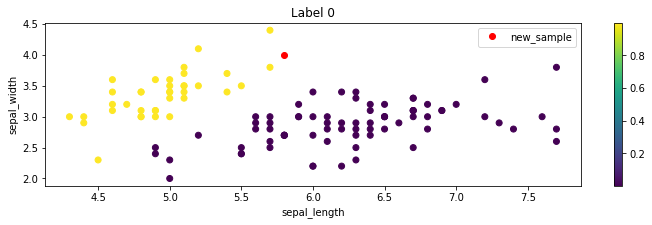

In [69]:
plot_prediction(0, columns=['sepal_length', 'sepal_width'])

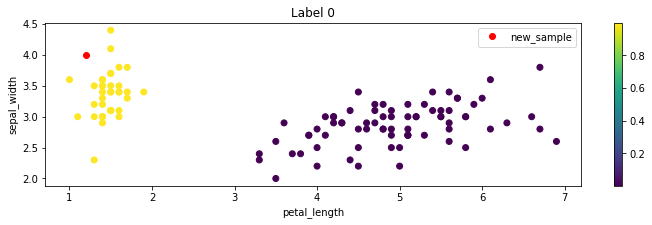

In [70]:
plot_prediction(0, columns=['petal_length', 'sepal_width'])

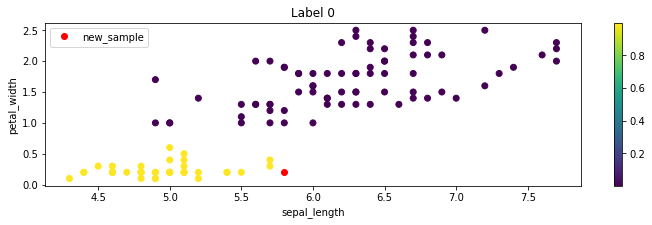

In [71]:
plot_prediction(0, columns=['sepal_length', 'petal_width'])

# Test

In [77]:
from sklearn.metrics import confusion_matrix, f1_score

In [75]:
predictions = model.predict(X_test)

In [86]:
confusion_matrix(y_test, predictions, labels=[0,1,2])

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [81]:
f1_score(y_test, predictions, average='micro')

0.9736842105263158